# Distribição de insumos para a COVID-19 no Brasil - Publicando Gráficos Interativos

Os dados para este estudo foram coletados do Portal Brasileiro de Dados Abertos. 

#### Distribuição de ventiladores mecânicos
- [Fonte](https://dados.gov.br/dataset/distribuicao-de-respiradores)

#### Distribuição de EPIs
- [Fonte](https://dados.gov.br/dataset/distribuicao-de-equipamentos-de-protecao-individual-e-insumos-covid-19)


# Parte 1: Ventiladores Mecânicos

## Conhecendo o arquivo e os dados

In [4]:
!pip install datapane

In [5]:
!pip install plotly

In [99]:
#Data Analysis
import pandas as pd
import numpy as np 

#Data Visualization (Static Visualizations)
import matplotlib.pyplot as plt 
plt.rcParams.update({'font.size': 10})
import seaborn as sns

#Interactive visualizations
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go

#Report Publishing
import datapane as dp

#import cufflinks as cf
#pd.options.plotting.backend = "plotly"
#import calendar
#import altair as alt
#py.init_notebook_mode(connected=True)
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#import plotly
#% matplotlib inline
#init_notebook_mode(connected=True)

In [100]:
df_vent = pd.read_csv('distribuicao_respiradores.csv', sep=';', decimal= ',')
df_vent.head()

,DATA,FORNECEDOR,DESTINO,ESTADO/MUNICIPIO,TIPO,QUANTIDADE,VALOR,DESTINATARIO,UF,DATA DE ENTREGA
0,19/04/2020,VYAIRE,RIO DE JANEIRO,ESTADO,UTI,40,"2400000,00",ALMOXARIFADO ESTADUAL DE MEDICAMENTOS - RIO DE...,RJ,19/04/2020
1,22/04/2020,VYAIRE,RIO DE JANEIRO,ESTADO,UTI,20,"1200000,00",LABORATÓRIO QUÍMICO FARMACÊUTICO DE AERONÁUTICA,RJ,23/04/2020
2,08/05/2020,MAGNAMED,RIO DE JANEIRO,ESTADO,UTI,25,"1500000,00",ALMOXARIFADO ESTADUAL DE MEDICAMENTOS - RIO DE...,RJ,09/05/2020
3,08/05/2020,KTK,RIO DE JANEIRO,ESTADO,UTI,15,"900000,00",ALMOXARIFADO ESTADUAL DE MEDICAMENTOS - RIO DE...,RJ,09/05/2020
4,09/05/2020,LEISTUNG,RIO DE JANEIRO,ESTADO,UTI,6,"360000,00",ALMOXARIFADO ESTADUAL DE MEDICAMENTOS - RIO DE...,RJ,09/05/2020


Covertendo os decimais de , para . : 

In [101]:
df_vent['VALOR'] = df_vent['VALOR'].str.replace(",", ".").astype(float)
df_vent.head()

,DATA,FORNECEDOR,DESTINO,ESTADO/MUNICIPIO,TIPO,QUANTIDADE,VALOR,DESTINATARIO,UF,DATA DE ENTREGA
0,19/04/2020,VYAIRE,RIO DE JANEIRO,ESTADO,UTI,40,2400000.0,ALMOXARIFADO ESTADUAL DE MEDICAMENTOS - RIO DE...,RJ,19/04/2020
1,22/04/2020,VYAIRE,RIO DE JANEIRO,ESTADO,UTI,20,1200000.0,LABORATÓRIO QUÍMICO FARMACÊUTICO DE AERONÁUTICA,RJ,23/04/2020
2,08/05/2020,MAGNAMED,RIO DE JANEIRO,ESTADO,UTI,25,1500000.0,ALMOXARIFADO ESTADUAL DE MEDICAMENTOS - RIO DE...,RJ,09/05/2020
3,08/05/2020,KTK,RIO DE JANEIRO,ESTADO,UTI,15,900000.0,ALMOXARIFADO ESTADUAL DE MEDICAMENTOS - RIO DE...,RJ,09/05/2020
4,09/05/2020,LEISTUNG,RIO DE JANEIRO,ESTADO,UTI,6,360000.0,ALMOXARIFADO ESTADUAL DE MEDICAMENTOS - RIO DE...,RJ,09/05/2020


In [102]:
print(df_vent.columns.tolist())

['DATA', 'FORNECEDOR', 'DESTINO', 'ESTADO/MUNICIPIO', 'TIPO', 'QUANTIDADE', 'VALOR', 'DESTINATARIO', 'UF', 'DATA DE ENTREGA']


#### Deletando alguns dados desnecessários para a análise

In [103]:
df_vent.drop(['DATA', 'DESTINATARIO', 'UF'], axis = 1, inplace=True)

In [104]:
df_vent.dtypes

FORNECEDOR           object
DESTINO              object
ESTADO/MUNICIPIO     object
TIPO                 object
QUANTIDADE            int64
VALOR               float64
DATA DE ENTREGA      object
dtype: object

In [105]:
df_vent.shape

(1730, 7)

#### Deletando dados duplicados

In [106]:
df_vent.duplicated().sum()

491

In [107]:
df_vent = df_vent.drop_duplicates()

In [108]:
df_vent.shape

(1239, 7)

In [109]:
df_vent['VALOR'].sum()

588748524.8100001

In [110]:
df_vent.isnull().sum()

FORNECEDOR          0
DESTINO             0
ESTADO/MUNICIPIO    0
TIPO                0
QUANTIDADE          0
VALOR               0
DATA DE ENTREGA     0
dtype: int64

In [111]:
df_vent.isna().sum()

FORNECEDOR          0
DESTINO             0
ESTADO/MUNICIPIO    0
TIPO                0
QUANTIDADE          0
VALOR               0
DATA DE ENTREGA     0
dtype: int64

In [112]:
df_vent['QUANTIDADE'].sum()

11114

In [113]:
df_vent['DESTINO'].unique()

array(['RIO DE JANEIRO', 'ALAGOAS', 'BAHIA', 'DISTRITO FEDERAL',
       'MARANHÃO', 'MINAS GERAIS', 'MATO GROSSO DO SUL', 'MATO GROSSO ',
       'ACRE', 'GOIAS', 'RONDONIA', 'RORAIMA', 'PARA', 'TOCANTINS',
       'AMAZONAS', 'AMAPA', 'PIAUI', 'PERNAMBUCO', 'PARAIBA', 'SERGIPE',
       'CEARA', 'RIO GRANDE DO NORTE', 'ESPIRITO SANTO ', 'SÃO PAULO',
       'RIO GRANDE DO SUL ', 'SANTA CATARINA', 'PARANA', 'LIBANO'],
      dtype=object)

Verificando a linha que indica destino = Líbano

In [114]:
df_vent[df_vent['DESTINO']=='LIBANO']

,FORNECEDOR,DESTINO,ESTADO/MUNICIPIO,TIPO,QUANTIDADE,VALOR,DATA DE ENTREGA
1729,MAGNAMED,LIBANO,-,TRANSPORTE,300,14487000.0,08/08/2020


Este dado refere-se à uma doação feita ao Líbano devido à explosão que aconteceu neste país em 2020. Esta linha será deletada para não influenciar os dados:

In [115]:
df_vent.drop(1729,0,inplace=True)

In [117]:
df_vent['QUANTIDADE'].sum()

10814

#### Informação sobre fornecedores

In [118]:
df_vent['FORNECEDOR'].unique()

array(['VYAIRE', 'MAGNAMED', 'KTK', 'LEISTUNG', 'LEISTUNG/VYAIRE',
       'KTK/VAYIRE', 'WEG', 'VYAIRE LTV 2200 USA', 'UTI',
       'VYAIRE LTV 1200 USA', 'MAGNAMED-REQUISIÇÃO',
       'SUZANO/Zhongxun Medical', 'SUZANO/Resmed',
       'L C DADDE COM AT INST MAT MEDICO EPP', 'MAGNAMED/REQUISIÇÃO',
       'Leistung'], dtype=object)

Neste caso temos o mesmo fornecedor com nomes diferentes, vamos padronizar:

In [119]:
df_vent['FORNECEDOR'] = df_vent['FORNECEDOR'].replace(['MAGNAMED-REQUISIÇÃO', 'MAGNAMED/REQUISIÇÃO', 'VYAIRE LTV 1200 USA', 'VYAIRE LTV 2200 USA', 'L C DADDE COM AT INST MAT MEDICO EPP', 'Leistung' ], ['MAGNAMED', 'MAGNAMED', 'VYAIRE', 'VYAIRE', 'APOLLO MEDICAL', 'LEISTUNG' ])

In [120]:
df_vent['FORNECEDOR'].unique()

array(['VYAIRE', 'MAGNAMED', 'KTK', 'LEISTUNG', 'LEISTUNG/VYAIRE',
       'KTK/VAYIRE', 'WEG', 'UTI', 'SUZANO/Zhongxun Medical',
       'SUZANO/Resmed', 'APOLLO MEDICAL'], dtype=object)

In [121]:
df_vent['FORNECEDOR'].value_counts()

MAGNAMED                   528
VYAIRE                     408
KTK                        192
LEISTUNG                    74
WEG                         30
SUZANO/Resmed                1
APOLLO MEDICAL               1
LEISTUNG/VYAIRE              1
SUZANO/Zhongxun Medical      1
KTK/VAYIRE                   1
UTI                          1
Name: FORNECEDOR, dtype: int64

Para melhorar a visualização dos dados vamos agrupar alguns fornecedores com poucos dados em um grupo 'Outros'. 

In [125]:
df_vent['FORNECEDOR'] = df_vent['FORNECEDOR'].replace(['APOLLO MEDICAL', 'KTK/VAYIRE', 'SUZANO/Resmed', 'SUZANO/Zhongxun Medical', 'LEISTUNG/VYAIRE', 'UTI'], 'VÁRIOS')

In [126]:
df_vent['FORNECEDOR'].unique()

array(['VYAIRE', 'MAGNAMED', 'KTK', 'LEISTUNG', 'VÁRIOS', 'WEG'],
      dtype=object)

#### Tipos de ventiladores

In [127]:
df_vent['TIPO'].unique()

array(['UTI', 'TRANSPORTE', 'TRANSPORTE USA', 'Transporte USA',
       'Transporte'], dtype=object)

Deveriam ser apenas 2 tipos portanto os dados deverão ser tratados:

In [128]:
df_vent['TIPO']=df_vent['TIPO'].replace(['TRANSPORTE USA', 'Transporte USA', 'Transporte'], 'TRANSPORTE')

In [129]:
df_vent['TIPO'].unique()

array(['UTI', 'TRANSPORTE'], dtype=object)

#### Criando coluna para regiões

In [130]:
df_vent['DESTINO'].unique()

array(['RIO DE JANEIRO', 'ALAGOAS', 'BAHIA', 'DISTRITO FEDERAL',
       'MARANHÃO', 'MINAS GERAIS', 'MATO GROSSO DO SUL', 'MATO GROSSO ',
       'ACRE', 'GOIAS', 'RONDONIA', 'RORAIMA', 'PARA', 'TOCANTINS',
       'AMAZONAS', 'AMAPA', 'PIAUI', 'PERNAMBUCO', 'PARAIBA', 'SERGIPE',
       'CEARA', 'RIO GRANDE DO NORTE', 'ESPIRITO SANTO ', 'SÃO PAULO',
       'RIO GRANDE DO SUL ', 'SANTA CATARINA', 'PARANA'], dtype=object)

In [131]:
dict={'RIO DE JANEIRO': 'SUDESTE', 'SÃO PAULO':'SUDESTE', 'RIO GRANDE DO SUL ':'SUL', 'PARANA':'SUL', 'MINAS GERAIS':'SUDESTE', 'ESPIRITO SANTO ':'SUDESTE', 'SANTA CATARINA':'SUL', 'ACRE':'NORTE', 'AMAPA':'NORTE', 'AMAZONAS':'NORTE', 'RORAIMA':'NORTE', 'RONDONIA':'NORTE', 'PARA':'NORTE', 'TOCANTINS':'CENTRO-OESTE', 'DISTRITO FEDERAL':'CENTRO-OESTE', 'MATO GROSSO DO SUL':'CENTRO-OESTE', 'MATO GROSSO ':'CENTRO-OESTE', 'GOIAS':'CENTRO-OESTE', 'ALAGOAS':'NORDESTE', 'BAHIA':'NORDESTE', 'SERGIPE':'NORDESTE', 'RIO GRANDE DO NORTE':'NORDESTE', 'PIAUI':'NORDESTE', 'MARANHÃO':'NORDESTE', 'CEARA':'NORDESTE', 'PARAIBA':'NORDESTE', 'PERNAMBUCO':'NORDESTE'}

In [132]:
df_vent['REGIAO']=df_vent['DESTINO'].map(dict)
df_vent.head()

,FORNECEDOR,DESTINO,ESTADO/MUNICIPIO,TIPO,QUANTIDADE,VALOR,DATA DE ENTREGA,REGIAO
0,VYAIRE,RIO DE JANEIRO,ESTADO,UTI,40,2400000.0,19/04/2020,SUDESTE
1,VYAIRE,RIO DE JANEIRO,ESTADO,UTI,20,1200000.0,23/04/2020,SUDESTE
2,MAGNAMED,RIO DE JANEIRO,ESTADO,UTI,25,1500000.0,09/05/2020,SUDESTE
3,KTK,RIO DE JANEIRO,ESTADO,UTI,15,900000.0,09/05/2020,SUDESTE
4,LEISTUNG,RIO DE JANEIRO,ESTADO,UTI,6,360000.0,09/05/2020,SUDESTE


In [133]:
df_vent['REGIAO'].unique()

array(['SUDESTE', 'NORDESTE', 'CENTRO-OESTE', 'NORTE', 'SUL'],
      dtype=object)

#### Coluna ESTADO/MUNICIPIO

In [116]:
df_vent['ESTADO/MUNICIPIO'].unique()

array(['ESTADO', 'MUNICIPIO', 'ESTADO '], dtype=object)

In [134]:
df_vent['ESTADO/MUNICIPIO']=df_vent['ESTADO/MUNICIPIO'].replace(['ESTADO '], 'ESTADO')
df_vent['ESTADO/MUNICIPIO'].unique()

array(['ESTADO', 'MUNICIPIO'], dtype=object)

### Extraindo o mês de entrega em cada região

In [137]:
df_vent['DATA DE ENTREGA'] = pd.to_datetime(df_vent['DATA DE ENTREGA'], errors='coerce')

In [138]:
df_vent['MÊS'] = pd.DatetimeIndex(df_vent['DATA DE ENTREGA']).month

## Visualizações Estáticas para a Base de Ventiladores

In [139]:
df_vent.head()

,FORNECEDOR,DESTINO,ESTADO/MUNICIPIO,TIPO,QUANTIDADE,VALOR,DATA DE ENTREGA,REGIAO,MÊS
0,VYAIRE,RIO DE JANEIRO,ESTADO,UTI,40,2400000.0,2020-04-19,SUDESTE,4.0
1,VYAIRE,RIO DE JANEIRO,ESTADO,UTI,20,1200000.0,2020-04-23,SUDESTE,4.0
2,MAGNAMED,RIO DE JANEIRO,ESTADO,UTI,25,1500000.0,2020-09-05,SUDESTE,9.0
3,KTK,RIO DE JANEIRO,ESTADO,UTI,15,900000.0,2020-09-05,SUDESTE,9.0
4,LEISTUNG,RIO DE JANEIRO,ESTADO,UTI,6,360000.0,2020-09-05,SUDESTE,9.0


In [140]:
df_vent.describe()

,QUANTIDADE,VALOR,MÊS
count,1238.000000,1.238000e+03,1235.000000
mean,8.735057,4.638623e+05,6.678543
std,13.059379,7.352837e+05,2.610194
min,1.000000,2.000000e+04,1.000000
25%,2.000000,9.658000e+04,5.000000
50%,5.000000,2.400000e+05,7.000000
75%,10.000000,4.829000e+05,8.000000
max,150.000000,7.243500e+06,12.000000


### Tipos de Ventiladores

Quantidade total 

In [142]:
df_gp_tp = df_vent.groupby('TIPO').sum().reset_index()
df_gp_tp['CUSTO_UNIT'] = df_gp_tp['VALOR']/df_gp_tp['QUANTIDADE']
df_gp_tp.head()

,TIPO,QUANTIDADE,VALOR,MÊS,CUSTO_UNIT
0,TRANSPORTE,5033,2.249980e+08,4369.0,44704.549952
1,UTI,5781,3.492635e+08,3879.0,60415.762827


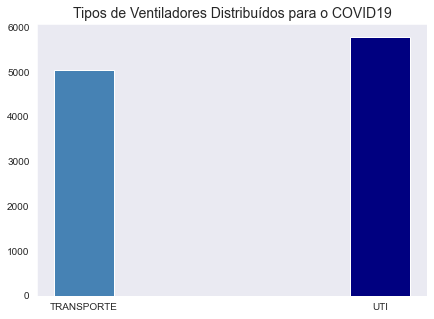

In [143]:
sns.set_style("dark")
plt.figure(figsize = (7,5))
plt.bar(df_gp_tp['TIPO'], df_gp_tp['QUANTIDADE'],  width=0.2, color=['steelblue', 'navy'])
plt.title('Tipos de Ventiladores Distribuídos para o COVID19', fontsize= 14)
plt.show()

#### Por região:

In [147]:
dfgrouped = df_vent.groupby('REGIAO').sum().reset_index().sort_values('QUANTIDADE', ascending=False)
dfgrouped['CUSTO_UNIT']=dfgrouped['VALOR']/dfgrouped['QUANTIDADE']
dfgrouped2 = dfgrouped.sort_values('CUSTO_UNIT',ascending=False).reset_index()

Text(0.5, 1.0, 'Valor unitário de ventiladores por região')

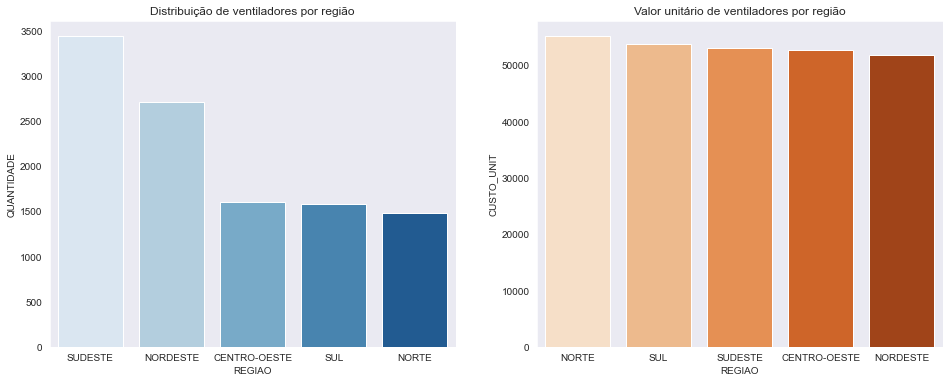

In [148]:
sns.set_style("dark")

fig, axes = plt.subplots(1, 2, figsize = (16,6))

sns.barplot(ax =axes[0], data=dfgrouped, x='REGIAO', y='QUANTIDADE', palette='Blues')
axes[0].set_title('Distribuição de ventiladores por região')

sns.barplot(ax= axes[1], data=dfgrouped2, x='REGIAO', y='CUSTO_UNIT', palette='Oranges')
axes[1].set_title('Valor unitário de ventiladores por região')

#### Por Estado

In [149]:
dfgrouped_r = df_vent.groupby('DESTINO').sum().reset_index().sort_values('QUANTIDADE', ascending=False)
dfgrouped_r['CUSTO_UNIT']=dfgrouped_r['VALOR']/dfgrouped_r['QUANTIDADE']
dfgrouped_r.head()

,DESTINO,QUANTIDADE,VALOR,MÊS,CUSTO_UNIT
18,RIO DE JANEIRO,1412,73802492.66,677.0,52268.054292
25,SÃO PAULO,1001,54532058.94,367.0,54477.581359
20,RIO GRANDE DO SUL,812,44630012.23,682.0,54963.069249
12,MINAS GERAIS,772,41948651.48,651.0,54337.631451
4,BAHIA,663,34520859.70,706.0,52067.661689


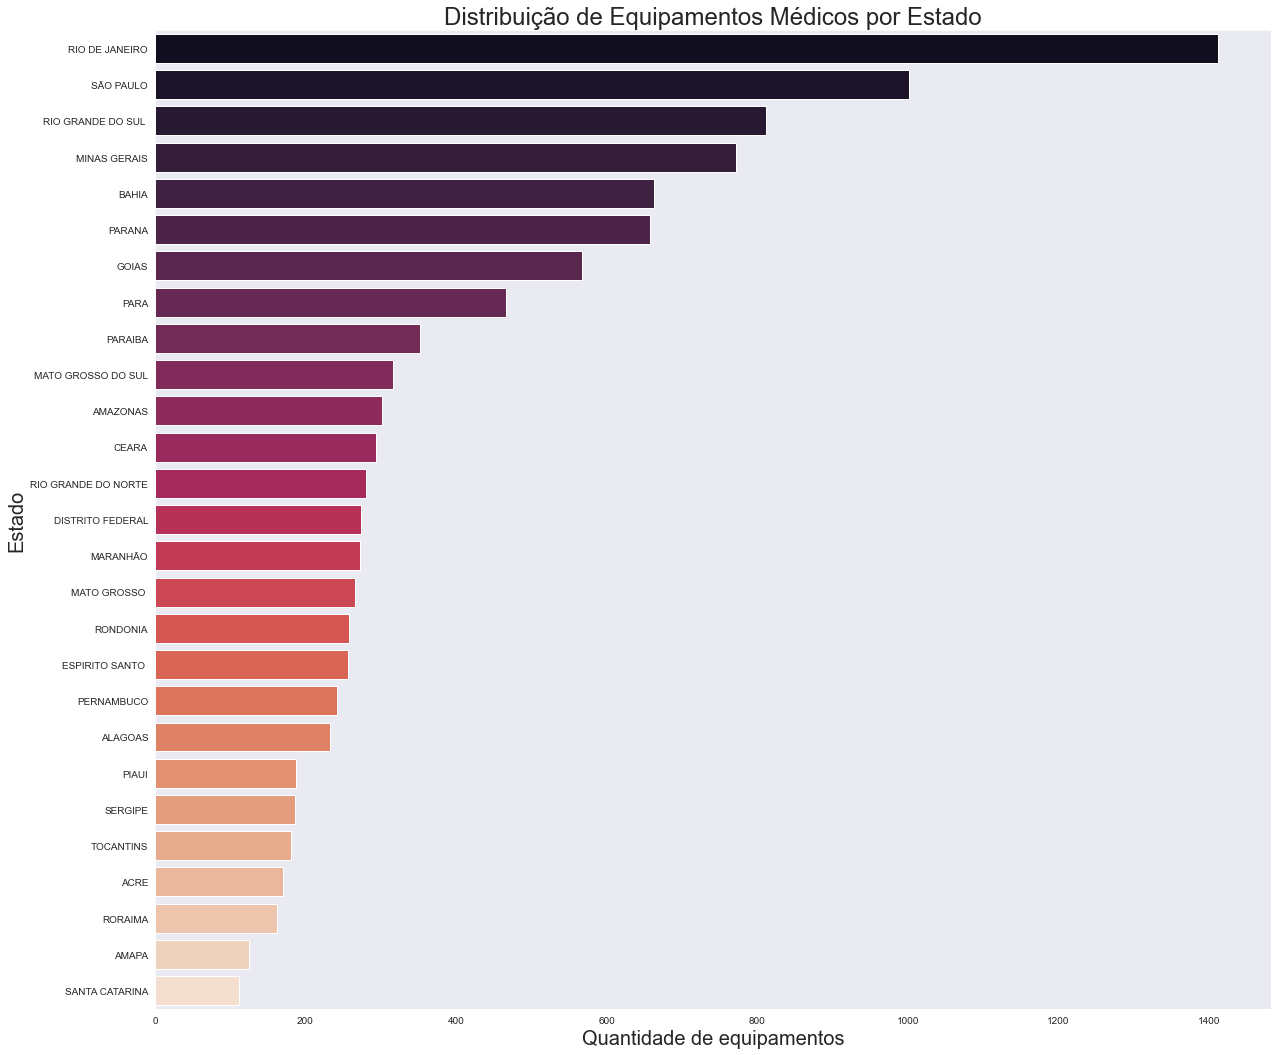

In [150]:
plt.figure(figsize = (20,18))
sns.barplot(data=dfgrouped_r,  x='QUANTIDADE', y='DESTINO', ci=None, palette='rocket')
plt.title('Distribuição de Equipamentos Médicos por Estado', fontsize= 24)
plt.xlabel('Quantidade de equipamentos', fontsize = 20)
plt.ylabel('Estado', fontsize=20);



#### Por Fornecedor

In [151]:
dfgrouped_f = df_vent.groupby('FORNECEDOR').sum().reset_index().sort_values('QUANTIDADE', ascending=False)
dfgrouped_f['CUSTO_UNIT']=dfgrouped_f['VALOR']/dfgrouped_f['QUANTIDADE']

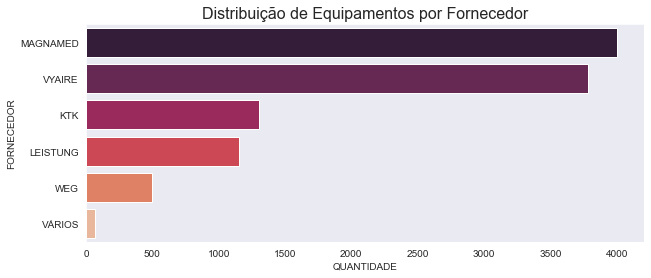

In [153]:
sns.set_style("dark")
plt.figure(figsize = (10,4))
sns.barplot(data = dfgrouped_f, x = 'QUANTIDADE', y = 'FORNECEDOR', ci = None, palette = 'rocket')
plt.title('Distribuição de Equipamentos por Fornecedor', fontsize= 16)
plt.show()

# Parte 2: Equipamentos de proteção individual 

## Conhecendo o arquivo e os dados

In [211]:
df_ppe = pd.read_csv('epi.csv', sep=';', decimal=',')
df_ppe.head()

,Material,Dt.Saída,Nº Pedido,Requisitante / Destino,Unidade,Quantidade,Status
0,Álcool,19/03/2020,308748,Acre,Litro,9.6,Entregue
1,Álcool,19/03/2020,308748,Acre,Litro,42.0,Entregue
2,Álcool,19/03/2020,308499,Acre,Litro,12.0,Entregue
3,Álcool,19/03/2020,308500,Acre,Litro,12.0,Entregue
4,Álcool,25/03/2020,309483,Acre,Litro,48.0,Entregue


In [212]:
df_ppe.drop('Nº Pedido', axis=1, inplace=True)

In [213]:
df_ppe.shape

(6404, 6)

In [214]:
df_ppe.dtypes

Material                   object
Dt.Saída                   object
Requisitante / Destino     object
Unidade                    object
Quantidade                float64
Status                     object
dtype: object

In [215]:
df_ppe['Quantidade'].sum()

315458209.8

In [216]:
df_ppe['Material'].unique()

array(['Álcool', 'Avental', 'Luva', 'Máscara Cirúrgica', 'Máscara N95',
       'Óculos e Protetor Facial', 'Sapatilha e Touca', 'Teste Rápido'],
      dtype=object)

In [217]:
df_ppe['Requisitante / Destino'].unique()

array(['Acre', 'Alagoas', 'Amapá', 'Amazonas', 'Bahia', 'Ceará',
       'Distrito Federal', 'Espírito Santo', 'Goiás', 'Maranhão',
       'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais',
       'Outros Órgãos Federais', 'Pará', 'Paraíba', 'Paraná',
       'Pernambuco', 'Piauí', 'Rio de Janeiro', 'Rio Grande do Norte',
       'Rio Grande do Sul', 'Rondônia', 'Roraima', 'Santa Catarina',
       'São Paulo', 'Sergipe', 'Tocantins'], dtype=object)

In [218]:
df_ppe['Requisitante / Destino'].value_counts()

Outros Órgãos Federais    1773
São Paulo                  214
Pará                       191
Maranhão                   184
Tocantins                  181
Santa Catarina             181
Ceará                      177
Mato Grosso do Sul         177
Espírito Santo             176
Piauí                      176
Bahia                      176
Mato Grosso                174
Paraíba                    173
Rio Grande do Norte        171
Goiás                      169
Acre                       169
Rio Grande do Sul          168
Sergipe                    167
Paraná                     167
Minas Gerais               167
Rondônia                   165
Amazonas                   164
Rio de Janeiro             163
Amapá                      163
Alagoas                    163
Pernambuco                 160
Roraima                    155
Distrito Federal           140
Name: Requisitante / Destino, dtype: int64

In [219]:
df_ppe['Material'].value_counts()

Máscara Cirúrgica           1272
Luva                        1034
Máscara N95                 1015
Óculos e Protetor Facial     796
Sapatilha e Touca            704
Álcool                       575
Avental                      569
Teste Rápido                 439
Name: Material, dtype: int64

In [220]:
df_ppe.isna().sum()

Material                  0
Dt.Saída                  0
Requisitante / Destino    0
Unidade                   0
Quantidade                0
Status                    0
dtype: int64

In [221]:
df_ppe.duplicated().sum()

1160

In [222]:
df_ppe.drop_duplicates()

,Material,Dt.Saída,Requisitante / Destino,Unidade,Quantidade,Status
0,Álcool,19/03/2020,Acre,Litro,9.6,Entregue
1,Álcool,19/03/2020,Acre,Litro,42.0,Entregue
2,Álcool,19/03/2020,Acre,Litro,12.0,Entregue
4,Álcool,25/03/2020,Acre,Litro,48.0,Entregue
5,Álcool,28/03/2020,Acre,Litro,19.2,Entregue
...,...,...,...,...,...,...
6399,Teste Rápido,03/11/2020,Distrito Federal,Teste,150000.0,Entregue
6400,Teste Rápido,29/10/2020,Outros Órgãos Federais,Teste,2300.0,Entregue
6401,Teste Rápido,12/11/2020,Rio de Janeiro,Teste,140.0,Entregue
6402,Teste Rápido,14/11/2020,Rio de Janeiro,Teste,136580.0,Entregue


### Convertendo a data para datetime

In [223]:
df_ppe['Dt.Saída'] = pd.to_datetime(df_ppe['Dt.Saída'])

In [224]:
df_ppe['Mes'] = pd.DatetimeIndex(df_ppe['Dt.Saída']).month
df_ppe.head()

,Material,Dt.Saída,Requisitante / Destino,Unidade,Quantidade,Status,Mes
0,Álcool,2020-03-19,Acre,Litro,9.6,Entregue,3
1,Álcool,2020-03-19,Acre,Litro,42.0,Entregue,3
2,Álcool,2020-03-19,Acre,Litro,12.0,Entregue,3
3,Álcool,2020-03-19,Acre,Litro,12.0,Entregue,3
4,Álcool,2020-03-25,Acre,Litro,48.0,Entregue,3


In [225]:
df_ppe_ordered = df_ppe.groupby('Dt.Saída').sum().reset_index().sort_values('Dt.Saída', ascending=True)

In [226]:
df_ppe_ordered.tail()

,Dt.Saída,Quantidade,Mes
95,2020-11-18,7200.0,11
96,2020-12-05,1330600.0,60
97,2020-12-06,147300.0,960
98,2020-12-08,2400.0,12
99,2020-12-11,140.0,12


In [227]:
dfppe_gp = df_ppe.groupby('Material').sum().reset_index().sort_values('Quantidade', ascending=False)
dfppe_gp.head()

,Material,Quantidade,Mes
2,Máscara Cirúrgica,212636050.0,7980
1,Luva,38870500.0,4040
3,Máscara N95,28886265.0,7108
4,Sapatilha e Touca,20320400.0,3904
5,Teste Rápido,8629080.0,2537


Text(0.5, 1.0, 'Quantidade de EPIs distribuída pelo Governo')

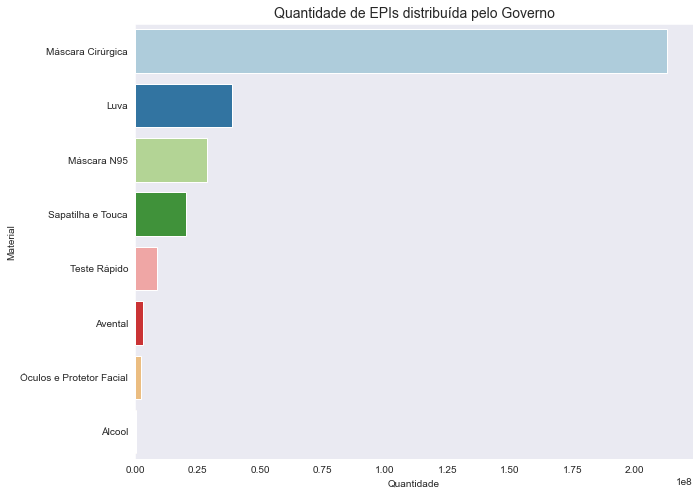

In [228]:
sns.set_style("dark")
plt.figure(figsize = (10,8))
sns.barplot(data=dfppe_gp, y='Material', x='Quantidade', palette='Paired')
plt.title('Quantidade de EPIs distribuída pelo Governo', fontsize= 14)
#plt.xlabel('Região', fontsize = 14)

# Parte 3: Visualizações Dinâmicas 

## Criando as figuras com plotly

In [1]:
dp.login(token='seu_token')

In [169]:
#  Selecting data and configuring width and opacity
data = [go.Bar(x=df_gp_tp['TIPO'], y=df_gp_tp['QUANTIDADE'], marker = {'color': 'cornflowerblue',
                         'line': {'color': 'midnightblue','width': 2}}, opacity= 0.8)]
#Layout configuration
config_lay = go.Layout(title='<b>Ventiladores por Tipo</b>',yaxis={'title':'Quantidade'},
                                 xaxis={'title':'Região'}, height=400, width=500)


fig1 = go.Figure(data=data, layout=config_lay)

#Creating graph
py.iplot(fig1)

In [175]:
dp.Report(dp.Plot(fig1), dp.Table(df_gp_tp)).publish(name='Distribuicao de Ventiladores por Tipo para COVID no Brasil', open=True)

Publishing report and associated data - please wait..
Report successfully published at https://datapane.com/u/mlfa03/reports/distribuicao-de-ventiladores-por-tipo-para-covid-no-brasil/


### Figura 2: Quantidade de Equipamentos por Região

In [176]:
#  Selecting data and configuring width and opacity
data = [go.Bar(x=dfgrouped['REGIAO'], y=dfgrouped['QUANTIDADE'], marker = {'color': 'slateblue',
                         'line': {'color': 'midnightblue','width': 2}}, opacity= 0.8)]
#Layout configuration
config_lay = go.Layout(title='<b>Quantidade de Ventiladores por Região</b>',yaxis={'title':'Quantidade'},
                                 xaxis={'title':'Região'})
fig2 = go.Figure(data=data, layout=config_lay)

#Creating graph
py.iplot(fig2)

In [177]:
dp.Report(dp.Plot(fig2), dp.Table(dfgrouped)).publish(name='Distribuicao de Ventiladores por Região para COVID no Brasil', open=True)

Publishing report and associated data - please wait..
Report successfully published at https://datapane.com/u/mlfa03/reports/distribuicao-de-ventiladores-por-regiao-para-covid-no-brasil/


### Figura 3: Custo unitário de ventiladores por região

In [178]:
#  Selecting data and configuring width and opacity
data = [go.Bar(x=dfgrouped2['REGIAO'], y=dfgrouped2['CUSTO_UNIT'], marker = {'color': 'firebrick',
                         'line': {'color': 'darkred','width': 2}}, opacity= 0.6)]
#Layout configuration
config_lay = go.Layout(title='<b>Custo Unitário de Ventiladores por Região</b>',yaxis={'title':'Custo Unitário Médio em R$'},
                                 xaxis={'title':'Região'})
fig3 = go.Figure(data=data, layout=config_lay)

#Creating graph
py.iplot(fig3)

In [182]:
dp.Report(dp.Plot(fig3)).publish(name='Custo unitário dos ventiladores por região', open=True)

Publishing report and associated data - please wait..
Report successfully published at https://datapane.com/u/mlfa03/reports/custo-unitario-dos-ventiladores-por-regiao/


### Figura 4 - Distribuição por Mês


In [195]:
df_mth = df_vent.groupby('MÊS').sum().reset_index()
df_mth.head()

,MÊS,QUANTIDADE,VALOR
0,1.0,594,33283825.07
1,2.0,274,15068900.00
2,3.0,482,24074513.58
3,4.0,427,26011374.90
4,5.0,1888,97519698.65


In [196]:
fig4 = px.line(df_mth, x="MÊS", y="QUANTIDADE" , title = '<b>Quantidade de Ventiladores Distribuídos por Mês</b>')
fig4.data[0].update(mode='markers+lines')
fig4.show()

### Figura 5: Gastos por Mês

In [197]:
df_mth = df_vent.groupby('MÊS').sum().reset_index()
df_mth.head()

,MÊS,QUANTIDADE,VALOR
0,1.0,594,33283825.07
1,2.0,274,15068900.00
2,3.0,482,24074513.58
3,4.0,427,26011374.90
4,5.0,1888,97519698.65


In [198]:
fig5 = px.line(df_mth, x="MÊS", y="VALOR" , title = '<b>Gasto mensal com aquisição de equipamentos</b>')
fig5.data[0].update(mode='markers+lines')
fig5.show()

### Figuta 6: Gastos por Mês por Região

In [199]:
df_mth2 = df_vent.groupby(['MÊS','REGIAO']).sum().reset_index()
df_mth2.head()

,MÊS,REGIAO,QUANTIDADE,VALOR
0,1.0,CENTRO-OESTE,48,2730895.97
1,1.0,NORDESTE,197,10789520.00
2,1.0,NORTE,58,2525800.00
3,1.0,SUDESTE,265,15876679.10
4,1.0,SUL,26,1360930.00


In [191]:
fig6 = px.line(df_mth2, x="MÊS", y="VALOR", color='REGIAO', title = '<b>Gasto mensal com aquisição de equipamentos por Região</b>', width=900, height=500)
fig6.update_traces(mode='markers+lines')


fig6.show()

In [193]:
dp.Report(dp.Plot(fig6), dp.Table(df_mth2)).publish(name='Gastos em Ventiladores Hospitalares por Regiao em 2020', open=True)

Publishing report and associated data - please wait..
Report successfully published at https://datapane.com/u/mlfa03/reports/gastos-em-ventiladores-hospitalares-por-regiao-em-2020/


### Figura 7: Ventiladores Por Fornecedor

In [200]:
dfgrouped_f.head()

,FORNECEDOR,QUANTIDADE,VALOR,MÊS,CUSTO_UNIT
2,MAGNAMED,4005,1.995960e+08,3457.0,49836.714107
3,VYAIRE,3787,2.291050e+08,2728.0,60497.744893
0,KTK,1302,4.004000e+07,1329.0,30752.688172
1,LEISTUNG,1156,6.927700e+07,500.0,59928.200692
5,WEG,496,2.976000e+07,205.0,60000.000000


In [201]:
data = [go.Bar(x=dfgrouped_f['QUANTIDADE'], y=dfgrouped_f['FORNECEDOR'], orientation='h', marker = {'color': 'mediumorchid','line': {'color': 'indigo','width': 2}}, opacity= 0.7)]

config_lay = go.Layout(title='<b>Quantidade de Ventiladores por Fornecedor</b>',yaxis={'title':'Fornecedor'},
                                 xaxis={'title':'Quantidade'})
fig7 = go.Figure(data=data, layout=config_lay)

py.iplot(fig7)

In [202]:
dp.Report(dp.Plot(fig7)).publish(name='Fornecedores de ventiladores para COVID no Brasil', open=True)

Publishing report and associated data - please wait..
Report successfully published at https://datapane.com/u/mlfa03/reports/fornecedores-de-ventiladores-para-covid-no-brasil/


### Figura 8 : Custo do Ventilador por Fornecedor

In [203]:
dfgrouped_f2 = dfgrouped_f.sort_values('CUSTO_UNIT', ascending=False)
dfgrouped_f2.head()

,FORNECEDOR,QUANTIDADE,VALOR,MÊS,CUSTO_UNIT
4,VÁRIOS,68,6.483525e+06,29.0,95345.954412
3,VYAIRE,3787,2.291050e+08,2728.0,60497.744893
5,WEG,496,2.976000e+07,205.0,60000.000000
1,LEISTUNG,1156,6.927700e+07,500.0,59928.200692
2,MAGNAMED,4005,1.995960e+08,3457.0,49836.714107


In [205]:
data = [go.Bar(x=dfgrouped_f2['FORNECEDOR'], y=dfgrouped_f2['CUSTO_UNIT'], marker = {'color': 'darkturquoise','line': {'color': 'darkslategrey','width': 2}}, opacity= 0.6)]

config_lay = go.Layout(title='<b>Custo Unitário de Ventiladores por Fornecedor</b>',yaxis={'title':'Custo Unitário em Reais (R$)'},
                                 xaxis={'title':'Fornecedor'})
fig8 = go.Figure(data=data, layout=config_lay)

py.iplot(fig8)

### Figura 9: Distribuição de EPIs por Mês

In [229]:
df_ppe.head()

,Material,Dt.Saída,Requisitante / Destino,Unidade,Quantidade,Status,Mes
0,Álcool,2020-03-19,Acre,Litro,9.6,Entregue,3
1,Álcool,2020-03-19,Acre,Litro,42.0,Entregue,3
2,Álcool,2020-03-19,Acre,Litro,12.0,Entregue,3
3,Álcool,2020-03-19,Acre,Litro,12.0,Entregue,3
4,Álcool,2020-03-25,Acre,Litro,48.0,Entregue,3


In [230]:
dfppe_mth = df_ppe.groupby(['Mes', 'Material']).sum().reset_index()
dfppe_mth.head()

,Mes,Material,Quantidade
0,2,Máscara Cirúrgica,15414600.0
1,2,Máscara N95,1558430.0
2,3,Avental,742000.0
3,3,Luva,27185000.0
4,3,Máscara Cirúrgica,21025300.0


In [231]:
fig9 = px.line(dfppe_mth, x="Mes", y="Quantidade", color='Material', title = '<b>Distribuição de EPIs por Mês</b>', width=900, height=500)
fig9.update_traces(mode='markers+lines')
fig9.show()

### Figura 10: Tipos e quantidades de EPIs distribuídos

In [232]:
dfppe_gp.head()

,Material,Quantidade,Mes
2,Máscara Cirúrgica,212636050.0,7980
1,Luva,38870500.0,4040
3,Máscara N95,28886265.0,7108
4,Sapatilha e Touca,20320400.0,3904
5,Teste Rápido,8629080.0,2537


In [234]:
data = [go.Bar(y=dfppe_gp['Material'], x=dfppe_gp['Quantidade'], orientation='h', marker = {'color': 'gold','line': {'color': 'goldenrod','width': 2}}, opacity= 0.6)]

config_lay = go.Layout(title='<b>EPIs Distribuídos por Tipo</b>',yaxis={'title':'Tipo de Material'},
                                 xaxis={'title':'Quantidade'}, width=900, height=500)
fig10 = go.Figure(data=data, layout=config_lay)

py.iplot(fig10)

In [238]:
dp.Report(dp.Plot(fig10)).publish(name='EPIs distribuidos para combate ao COVID no Brasil', open=True)

Publishing report and associated data - please wait..
Report successfully published at https://datapane.com/u/mlfa03/reports/epis-distribuidos-para-combate-ao-covid-no-brasil/


## Publicando o relatorio no datapane

In [236]:
dp.Report(dp.Blocks(dp.Plot(fig2), dp.Plot(fig3), dp.Plot(fig1), columns=2, rows=2), dp.Plot(fig4), dp.Plot(fig5), dp.Plot(fig6), dp.Blocks(dp.Plot(fig7), dp.Plot(fig8), columns=2, rows=1), dp.Plot(fig9), dp.Plot(fig10)).publish(name='COVID_Equipment_Distribution_Brazil', open=True)

Publishing report and associated data - please wait..
Report successfully published at https://datapane.com/u/mlfa03/reports/covid-equipment-distribution-brazil/
